### example sea ice area
based on Anton Steketee's COSIMA recipes notebook

In [1]:
import iris
import matplotlib.pyplot as plt
from iris import quickplot

from esmvalcore.dataset import Dataset
from esmvalcore.preprocessor import (
            mask_outside_range,
            extract_region,
            area_statistics,
            annual_statistics
)

/g/data/xp65/public/apps/med_conda/envs/esmvaltool-0.8/lib/python3.11/site-packages/esmvalcore/config/_config_object.py:639: ESMValCoreDeprecationWarning: Usage of the single configuration file ~/.esmvaltool/config-user.yml or specifying it via CLI argument `--config_file` has been deprecated in ESMValCore version 2.12.0 and is scheduled for removal in version 2.14.0. Please run `mkdir -p ~/.config/esmvaltool && mv /home/189/fc6164/.esmvaltool/config-user.yml ~/.config/esmvaltool` (or alternatively use a custom `--config_dir`) and omit `--config_file`.
  config_obj.reload()
/g/data/xp65/public/apps/med_conda/envs/esmvaltool-0.8/lib/python3.11/site-packages/esmvalcore/config/_config_validators.py:405: ESMValCoreDeprecationWarning: The configuration option or command line argument `config_file` has been deprecated in ESMValCore version 2.12.0 and is scheduled for removal in version 2.14.0. Please use the option `config_dir` instead.
  _handle_deprecation(option, deprecated_version, remov

In [2]:
from esmvalcore.config import CFG
CFG.load_from_file('/home/189/fc6164/esmValTool/config-fc-copy.yml')

/jobfs/138469908.gadi-pbs/ipykernel_1274505/2520668074.py:2: ESMValCoreDeprecationWarning: The method `CFG.load_from_file()` has been deprecated in ESMValCore version 2.12.0 and is scheduled for removal in version 2.14.0. Please use `CFG.load_from_dirs()` instead.
  CFG.load_from_file('/home/189/fc6164/esmValTool/config-fc-copy.yml')
/g/data/xp65/public/apps/med_conda/envs/esmvaltool-0.8/lib/python3.11/site-packages/esmvalcore/config/_config_validators.py:405: ESMValCoreDeprecationWarning: The configuration option or command line argument `config_file` has been deprecated in ESMValCore version 2.12.0 and is scheduled for removal in version 2.14.0. Please use the option `config_dir` instead.
  _handle_deprecation(option, deprecated_version, remove_version, more_info)


In [3]:
## define data
# in kj13
obs = Dataset(
    short_name='siconc', mip='SImon', project='OBS6', type='reanaly',
    dataset='NSIDC-G02202-sh', tier='3', version='4', timerange='1979/2018',
)

# Add areacello as supplementary dataset
obs.add_supplementary(short_name='areacello', mip='Ofx')

model = Dataset(
    short_name='siconc', mip='SImon', project='CMIP6', activity='CMIP',
    dataset='ACCESS-ESM1-5', ensemble='r1i1p1f1', grid='gn', exp='historical',
    timerange='1960/2010', institute = '*',
)

om_facets={'dataset' :'ACCESS-OM2', 'exp':'omip2', 'activity':'OMIP', 'timerange':'0306/0366' }

model.add_supplementary(short_name='areacello', mip='Ofx')

model_om = model.copy(**om_facets) 


In [4]:
## loop through data, plot

# om - index 1 to offset years
load_data = [model, model_om, obs] 

# function to use for both min and max ['max','min'] 

def trends_seaicearea(min_max):
    plt.clf()
    for i,data in enumerate(load_data):
        cube = data.load()
        cube = mask_outside_range(cube, 15, 100)
        cube = extract_region(cube,0,360,-90,0)
        cube = area_statistics(cube, 'sum')
        cube = annual_statistics(cube, min_max)
    
        iris.util.promote_aux_coord_to_dim_coord(cube, 'year')
        cube.convert_units('km2')
        if i == 1: ## om years 306/366
            cube.coord('year').points = [y + 1652 for y in cube.coord('year').points]
        label_name = data['dataset']
        print(label_name, cube.shape)
        quickplot.plot(cube, label=label_name)
    
    plt.title(f'Trends in Sea-Ice {min_max.title()}ima')
    plt.ylabel('Sea-Ice Area (km2)')
    plt.legend()

/g/data/xp65/public/apps/med_conda/envs/esmvaltool-0.8/lib/python3.11/site-packages/esmvalcore/config/_config_validators.py:405: ESMValCoreDeprecationWarning: The configuration option or command line argument `config_file` has been deprecated in ESMValCore version 2.12.0 and is scheduled for removal in version 2.14.0. Please use the option `config_dir` instead.
  _handle_deprecation(option, deprecated_version, remove_version, more_info)
/g/data/xp65/public/apps/med_conda/envs/esmvaltool-0.8/lib/python3.11/site-packages/esmvalcore/config/_config_validators.py:405: ESMValCoreDeprecationWarning: The configuration option or command line argument `config_file` has been deprecated in ESMValCore version 2.12.0 and is scheduled for removal in version 2.14.0. Please use the option `config_dir` instead.
  _handle_deprecation(option, deprecated_version, remove_version, more_info)


ACCESS-ESM1-5 (51,)


/g/data/xp65/public/apps/med_conda/envs/esmvaltool-0.8/lib/python3.11/site-packages/esmvalcore/config/_config_validators.py:405: ESMValCoreDeprecationWarning: The configuration option or command line argument `config_file` has been deprecated in ESMValCore version 2.12.0 and is scheduled for removal in version 2.14.0. Please use the option `config_dir` instead.
  _handle_deprecation(option, deprecated_version, remove_version, more_info)
/g/data/xp65/public/apps/med_conda/envs/esmvaltool-0.8/lib/python3.11/site-packages/esmvalcore/config/_config_validators.py:405: ESMValCoreDeprecationWarning: The configuration option or command line argument `config_file` has been deprecated in ESMValCore version 2.12.0 and is scheduled for removal in version 2.14.0. Please use the option `config_dir` instead.
  _handle_deprecation(option, deprecated_version, remove_version, more_info)


ACCESS-OM2 (61,)


/g/data/xp65/public/apps/med_conda/envs/esmvaltool-0.8/lib/python3.11/site-packages/esmvalcore/config/_config_validators.py:405: ESMValCoreDeprecationWarning: The configuration option or command line argument `config_file` has been deprecated in ESMValCore version 2.12.0 and is scheduled for removal in version 2.14.0. Please use the option `config_dir` instead.
  _handle_deprecation(option, deprecated_version, remove_version, more_info)
/g/data/xp65/public/apps/med_conda/envs/esmvaltool-0.8/lib/python3.11/site-packages/esmvalcore/config/_config_validators.py:405: ESMValCoreDeprecationWarning: The configuration option or command line argument `config_file` has been deprecated in ESMValCore version 2.12.0 and is scheduled for removal in version 2.14.0. Please use the option `config_dir` instead.
  _handle_deprecation(option, deprecated_version, remove_version, more_info)


NSIDC-G02202-sh (40,)


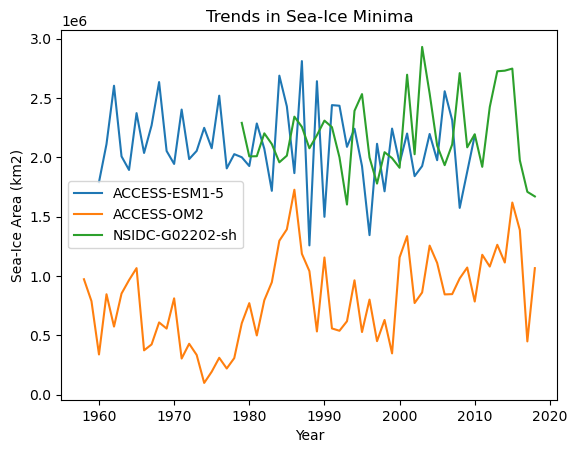

In [5]:
trends_seaicearea('min')

ACCESS-ESM1-5 (51,)
ACCESS-OM2 (61,)
NSIDC-G02202-sh (40,)


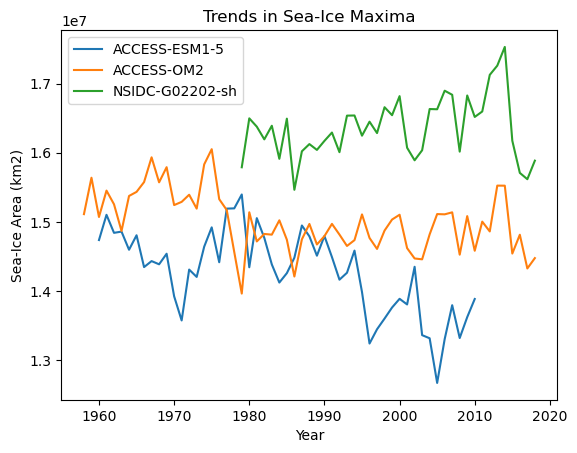

In [6]:
trends_seaicearea('max')

## map extents

In [7]:
import calendar
import iris.plot as iplt
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
from cartopy.crs import SouthPolarStereo
from esmvalcore.preprocessor import extract_month
from esmvalcore.preprocessor import climate_statistics
from esmvalcore.preprocessor import regrid

def preproc(cube):
    cube = climate_statistics(cube, operator='mean', period='monthly')
    cube = regrid(cube, target_grid="0.5x0.5", scheme="linear")
    cube = extract_region(cube, 0, 360, -90, -50)
    return cube

def map_fig_diff(model_dict, obs_si, months):
    """Create map with model dictionary: labels, cubes."""
    # figure set up, width 9 for 2 models
    figure = plt.figure(figsize=(9, len(months) * 3.5))
    j = 0  # to iterate through positions on figure

    for mon in months:  # eg.[2,9]
        i = 1
        obs_cube = extract_month(obs_si, mon)
        for mod_label, mod_si in model_dict.items():
            mod_cube = extract_month(mod_si, mon)

            out = mod_cube.copy()
            diff = mod_cube.data - obs_cube.data
            out.data = diff

            plt.subplot(len(months), 3, i + j * 3,
                        projection=SouthPolarStereo(true_scale_latitude=-70))

            diffmap = iplt.contourf(out, levels=np.arange(-90, 91, 20),
                                    cmap='RdBu')

            iplt.contour(obs_cube, levels=[15], colors=['yellow'])
            iplt.contour(mod_cube, levels=[15],
                         linewidths=1.0, colors=['black'])

            plt.title(calendar.month_abbr[mon] + ' ' + mod_label)

            i += 1
        j += 1

    line_cdr = mlines.Line2D([], [], color='yellow', label="Observed Extent")
    line_mod = mlines.Line2D([], [], color='black', label="Modelled Extent")

    plt.legend(handles=[line_cdr, line_mod], loc='center left',
               bbox_to_anchor=(1.2, 0.5))
    cax = plt.axes([0.7, 0.55, 0.04, 0.3])
    _ = plt.colorbar(diffmap, cax=cax,
                     label='Difference in \nSea Ice Concentration')

    plt.subplots_adjust(left=0.05, bottom=0.05,
                        right=0.95, top=0.95,
                        wspace=0.05, hspace=0.05)

    return figure

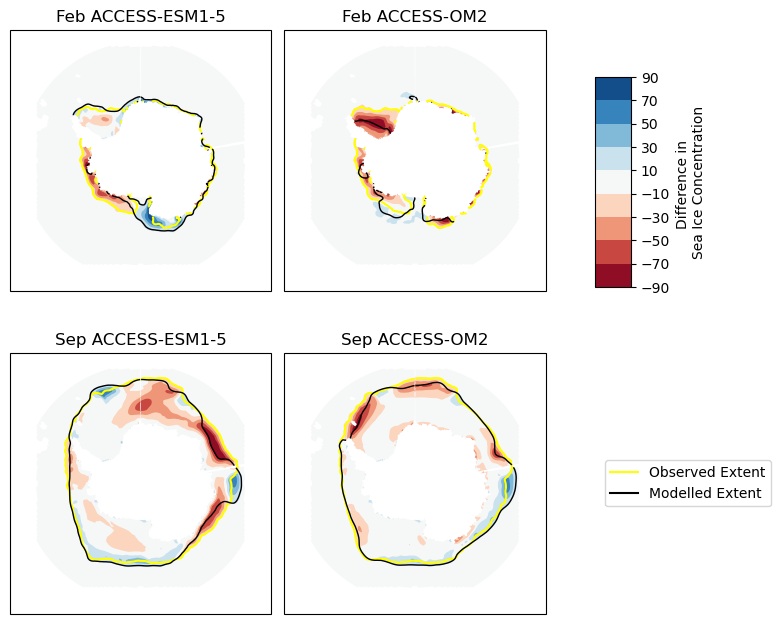

In [8]:
load_data = [model, model_om, obs]
mod_dict = {}
for data in [model, model_om]:
    ds = data['dataset']
    cube = data.load()
    cube = preproc(cube)
    mod_dict[ds] = cube

obs_si = preproc(obs.load())
figure = map_fig_diff(mod_dict, obs_si, [2,9])